# Taller 3
## Ejercicios CV

**Integrantes:** Dayana Valentina Gonzalez, Maria Fernanda Rodriguez

**[1]** Utilice validación cruzada (10 folds) para encontrar el mejor número de vecinos para la clasificación del dataset de iris con KNN. Sugerencia: lo pueden encontrar en `sklearn.datasets.load_iris()`

In [1]:
#importamos librerias
import statsmodels.formula.api as smf 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import mean_squared_error

from time import time

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y=iris.target
X = df

In [4]:
from sklearn.model_selection import cross_val_score

# Se define el modelo (sin ajustar)
model = KNeighborsClassifier(n_neighbors=10) #KNN

accuracies = cross_val_score(model, X, y, cv=10, scoring="accuracy")

In [5]:
accuracies

array([1.        , 0.93333333, 1.        , 1.        , 1.        ,
       0.86666667, 0.93333333, 0.93333333, 1.        , 1.        ])

In [6]:
accuracies.mean()

0.9666666666666668

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

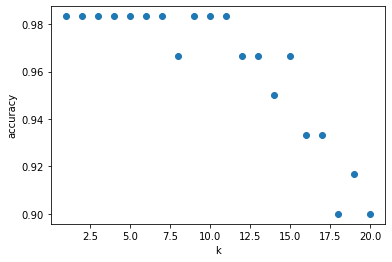

In [8]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
k_range = range(1,21)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    y_pred = cross_val_predict(knn, X_test, y_test, cv=10, method='predict', n_jobs=-1)
    scores.append(metrics.accuracy_score(y_test, y_pred))
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)

Utilizando el comanod de prediccion de validacion cruzada, teniendo en cuenta 10 folds, concluimos que el mejor numero de vecinos esta con un k de 1 a 7 y de 9 a 11.

**[2]** Realice una validación cruzada en el siguiente conjunto de datos simulados:

1. Genere un conjunto de datos simulados de la siguiente manera:
```python
np.random.seed(1) # import numpy as np
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e```
En este conjunto de datos, ¿cúal es el número de observaciones y cúal es el número de predictores?

2. Cree un diagrama de dispersión de X contra Y. Comente lo que encuentra.

3. Establezca una semilla aleatoria, y luego calcule los errores LOOCV que resulta de ajustar los siguientes cuatro modelos con mínimos cuadrados (regresión lineal o polinómica):

  1. $Y = \beta_0 + \beta_1 X + \epsilon$

  2. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 +\epsilon$

  3. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$

  4. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon$
  
  Puede resultarle útil utilizar un dataframe de Pandas para crear un solo conjunto de datos que contenga tanto X como Y. 
  
4. Repita (3) usando otra semilla aleatoria e informe sus resultados. ¿Los resultados son los mismos que obtuvo en (3)? ¿Por qué?

5. ¿Cuál de los modelos en (3) tuvo el error LOOCV más pequeño? ¿Es esto lo que esperaba? Explique la respuesta.

#### 1. Genere un conjunto de datos simulados de la siguiente manera:

In [9]:
np.random.seed(1) 
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e

El numero de observaciones es 100 y el numero de predictores es 1.

#### diagrama de dispersión 

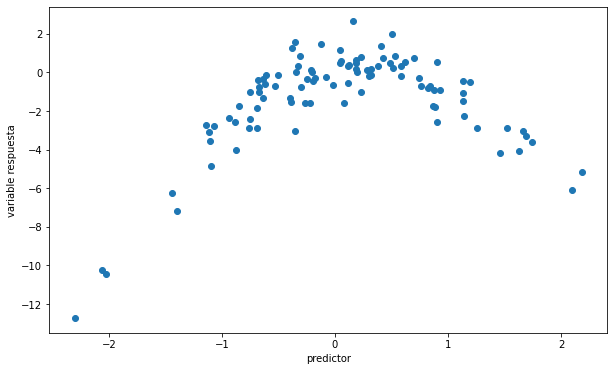

In [10]:
fig,ax = plt.subplots(figsize=(10, 6))
ax.scatter(x,y)
plt.xlabel("predictor")
plt.ylabel("variable respuesta")
plt.show()

#### Punto 3

In [11]:
np.random.seed(0) 
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e

In [12]:
x2=x**2
x3=x**3
x4=x**4

In [13]:
yy = pd.DataFrame({'y':y}, dtype='int64')
yy

,y
0,-2.576558
1,-1.267853
2,-2.207603
3,-6.832915
4,-6.281111
...,...
95,-0.463464
96,0.782070
97,-3.769292
98,2.257935


 1. $Y = \beta_0 + \beta_1 X + \epsilon$

In [26]:
df = pd.DataFrame({'x': x}, dtype='int64')

In [27]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut() # Se instancia al cross validator

loo.get_n_splits(df) # Devuelve el numero de particiones en el validador

100

In [28]:
from sklearn.metrics import accuracy_score
acc = [] # Define una lista para almacenar las exactitudes
y_pred2 =[]
MSE1 = []

for train_index, test_index in loo.split(df):
    
    X_train, X_test = df.loc[train_index], df.loc[test_index] # son dataframes por eso se usa "loc"
    y_train, y_test = yy.y.loc[train_index], yy.y.loc[test_index]
    #print(y_test)
    
    # Implementacion regresión
    model = KNeighborsRegressor(n_neighbors=5).fit( X_train, y_train )
    y_pred = model.predict(X_test)
    MSE1.append(mean_squared_error(y_test,y_pred))
    
mean_MSE = np.mean(MSE1) # Calcular MSE

print("Mean MSE 1 = ", mean_MSE)
    

Mean MSE 1 =  1.83471470454788


 2. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$

In [30]:
df.insert(1,"x2",x2,True)

In [31]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut() # Se instancia al cross validator

loo.get_n_splits(df) # Devuelve el numero de particiones en el validador

100

In [33]:
from sklearn.metrics import accuracy_score
acc = [] # Define una lista para almacenar las exactitudes
y_pred2 =[]
MSE1 = []

for train_index, test_index in loo.split(df):
    
    X_train, X_test = df.loc[train_index], df.loc[test_index] # son dataframes por eso se usa "loc"
    y_train, y_test = yy.y.loc[train_index], yy.y.loc[test_index]
    #print(y_test)
    
    # Implementacion regresión
    model = KNeighborsRegressor(n_neighbors=5).fit( X_train, y_train )
    y_pred = model.predict(X_test)
    MSE1.append(mean_squared_error(y_test,y_pred))
    
mean_MSE = np.mean(MSE1) # Calcular MSE

print("Mean MSE 2 = ", mean_MSE)
    

Mean MSE 2 =  1.8704061370467826


 3. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$

In [34]:
df.insert(2,"x3",x3,True)

In [35]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut() # Se instancia al cross validator

loo.get_n_splits(df) # Devuelve el numero de particiones en el validador

100

In [36]:
from sklearn.metrics import accuracy_score
acc = [] # Define una lista para almacenar las exactitudes
y_pred2 =[]
MSE1 = []

for train_index, test_index in loo.split(df):
    
    X_train, X_test = df.loc[train_index], df.loc[test_index] # son dataframes por eso se usa "loc"
    y_train, y_test = yy.y.loc[train_index], yy.y.loc[test_index]
    #print(y_test)
    
    # Implementacion regresión
    model = KNeighborsRegressor(n_neighbors=5).fit( X_train, y_train )
    y_pred = model.predict(X_test)
    MSE1.append(mean_squared_error(y_test,y_pred))
    
mean_MSE = np.mean(MSE1) # Calcular MSE

print("Mean MSE 3 = ", mean_MSE)
    

Mean MSE 3 =  1.8446007655978287


 4. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon$

In [37]:
df.insert(3,"x4",x4,True)

In [38]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut() # Se instancia al cross validator

loo.get_n_splits(df) # Devuelve el numero de particiones en el validador

100

In [39]:
from sklearn.metrics import accuracy_score
acc = [] # Define una lista para almacenar las exactitudes
y_pred2 =[]
MSE1 = []

for train_index, test_index in loo.split(df):
    
    X_train, X_test = df.loc[train_index], df.loc[test_index] # son dataframes por eso se usa "loc"
    y_train, y_test = yy.y.loc[train_index], yy.y.loc[test_index]
    #print(y_test)
    
    # Implementacion regresión
    model = KNeighborsRegressor(n_neighbors=5).fit( X_train, y_train )
    y_pred = model.predict(X_test)
    MSE1.append(mean_squared_error(y_test,y_pred))
    
mean_MSE = np.mean(MSE1) # Calcular MSE

print("Mean MSE 4 = ", mean_MSE)
    

Mean MSE 4 =  1.8593614897163866


#### Punto 4

In [120]:
np.random.seed(2) 
x = np.random.randn(100)
e = np.random.randn(100)
y = x - 2*x**2 + e

In [121]:
x2=x**2
x3=x**3
x4=x**4

In [122]:
yy = pd.DataFrame({'y':y}, dtype='int64')

 1. $Y = \beta_0 + \beta_1 X + \epsilon$

In [123]:
df = pd.DataFrame({'x': x}, dtype='int64')

In [124]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut() # Se instancia al cross validator

loo.get_n_splits(df) # Devuelve el numero de particiones en el validador

100

In [125]:
from sklearn.metrics import accuracy_score
acc = [] # Define una lista para almacenar las exactitudes
y_pred2 =[]
MSE1 = []

for train_index, test_index in loo.split(df):
    
    X_train, X_test = df.loc[train_index], df.loc[test_index] # son dataframes por eso se usa "loc"
    y_train, y_test = yy.y.loc[train_index], yy.y.loc[test_index]
    #print(y_test)
    
    # Implementacion regresión
    model = KNeighborsRegressor(n_neighbors=5).fit( X_train, y_train )
    y_pred = model.predict(X_test)
    MSE1.append(mean_squared_error(y_test,y_pred))
    
mean_MSE = np.mean(MSE1) # Calcular MSE

print("Mean MSE 1 = ", mean_MSE)
    

Mean MSE 1 =  2.1383627443410087


 2. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \epsilon$

In [126]:
df.insert(1,"x2",x2,True)

In [127]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut() # Se instancia al cross validator

loo.get_n_splits(df) # Devuelve el numero de particiones en el validador

100

In [128]:
from sklearn.metrics import accuracy_score
acc = [] # Define una lista para almacenar las exactitudes
y_pred2 =[]
MSE1 = []

for train_index, test_index in loo.split(df):
    
    X_train, X_test = df.loc[train_index], df.loc[test_index] # son dataframes por eso se usa "loc"
    y_train, y_test = yy.y.loc[train_index], yy.y.loc[test_index]
    #print(y_test)
    
    # Implementacion regresión
    model = KNeighborsRegressor(n_neighbors=5).fit( X_train, y_train )
    y_pred = model.predict(X_test)
    MSE1.append(mean_squared_error(y_test,y_pred))
    
mean_MSE = np.mean(MSE1) # Calcular MSE

print("Mean MSE 2 = ", mean_MSE)
    

Mean MSE 2 =  2.1361204378735605


 3. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \epsilon$

In [129]:
df.insert(2,"x3",x3,True)

In [130]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut() # Se instancia al cross validator

loo.get_n_splits(df) # Devuelve el numero de particiones en el validador

100

In [131]:
from sklearn.metrics import accuracy_score
acc = [] # Define una lista para almacenar las exactitudes
y_pred2 =[]
MSE1 = []

for train_index, test_index in loo.split(df):
    
    X_train, X_test = df.loc[train_index], df.loc[test_index] # son dataframes por eso se usa "loc"
    y_train, y_test = yy.y.loc[train_index], yy.y.loc[test_index]
    #print(y_test)
    
    # Implementacion regresión
    model = KNeighborsRegressor(n_neighbors=5).fit( X_train, y_train )
    y_pred = model.predict(X_test)
    MSE1.append(mean_squared_error(y_test,y_pred))
    
mean_MSE = np.mean(MSE1) # Calcular MSE

print("Mean MSE 3 = ", mean_MSE)

Mean MSE 3 =  2.1445351789129528


 4. $Y = \beta_0 + \beta_1 X + \beta_2 X^2 + \beta_3 X^3 + \beta_4 X^4 + \epsilon$

In [132]:
df.insert(3,"x4",x4,True)

In [133]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut() # Se instancia al cross validator

loo.get_n_splits(df) # Devuelve el numero de particiones en el validador

100

In [134]:
from sklearn.metrics import accuracy_score
acc = [] # Define una lista para almacenar las exactitudes
y_pred2 =[]
MSE1 = []

for train_index, test_index in loo.split(df):
    
    X_train, X_test = df.loc[train_index], df.loc[test_index] # son dataframes por eso se usa "loc"
    y_train, y_test = yy.y.loc[train_index], yy.y.loc[test_index]
    #print(y_test)
    
    # Implementacion regresión
    model = KNeighborsRegressor(n_neighbors=5).fit( X_train, y_train )
    y_pred = model.predict(X_test)
    MSE1.append(mean_squared_error(y_test,y_pred))
    
mean_MSE = np.mean(MSE1) # Calcular MSE

print("Mean MSE 4 = ", mean_MSE)
    

Mean MSE 4 =  1.9177298048155538


Los resultados no son los mismos al punto 3 debido a que comenzamos con un punto de partida diferente (semilla 2 en vez de semilla 0); Antes teníamos un conjunto de datos muy pequeños ya que usabamos la semilla 0 y ahora podemos ver un cambio en los errores cuadraticos y en los valores tomados por la variable x e y al utilizar los números mas grandes con la semilla 2.

**¿Cuál de los modelos en (3) tuvo el error LOOCV más pequeño? ¿Es esto lo que esperaba? Explique la respuesta.**  
El error mas pequeño lo tuvo el modelo 1. Esperabamos que el modelo 4 fuera el más preciso debido a que las otras variables lo ayudarían a acercarse al valor original, sin embargo parece que esto fue contraproducente ya que parece que las otras variables lo alejaron más de la precisión.